### Preparing the Data
- Importing needed libraries/tools
- Reading in the Pickle Files from 'CleanData' folder
- Splitting all_players to exclude players with 'no team'

*First Portion of this will be with the entire collection of data*

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [98]:
all_players = pd.read_pickle('/Users/powellshayne/Desktop/githubrepos/VictorVis/CleanData/all_players_df.pkl')
all_players

,player_name,real_name,team,age,rating,dpr,kpr,kast,impact,adr,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
0,ZywOo,Mathieu Herbaut,vitality,23,1.000000,0.333333,0.966667,0.924370,1.000000,0.855263,...,0.425633,0.505155,0.444444,0.37500,0.609195,0.180239,0.474026,0.652666,0.500000,0.742049
1,Spinx,Lotan Giladi,vitality,23,0.627451,0.476190,0.600000,0.663866,0.529412,0.549342,...,0.011076,0.013746,0.008889,0.00125,0.252874,0.173724,0.428571,0.410339,0.166667,0.862191
2,mezii,William Merriman,vitality,23,0.588235,0.428571,0.500000,0.747899,0.441176,0.536184,...,0.028481,0.030928,0.022222,0.01250,0.793103,0.277959,0.422078,0.781906,0.500000,0.819788
3,flameZ,Shahar Shushan,vitality,23,0.607843,0.571429,0.500000,0.689076,0.602941,0.549342,...,0.014241,0.017182,0.008889,0.00250,0.839080,0.302932,0.500000,0.765751,0.333333,0.667845
4,apEX,Dan Madesclaire,vitality,23,0.372549,0.714286,0.466667,0.352941,0.455882,0.523026,...,0.020570,0.020619,0.011111,0.02500,0.551724,0.232356,0.311688,0.434572,0.416667,0.713781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,seang@res,Sean Gares,no team,23,0.137255,0.666667,0.133333,0.302521,0.176471,0.200658,...,0.052215,0.089347,0.088889,0.07500,0.333333,0.292074,0.259740,0.426494,0.083333,0.448763
964,def,Dima Lemeshchuk,no team,23,0.098039,0.714286,0.133333,0.386555,0.147059,0.200658,...,0.012658,0.010309,0.010000,0.00000,0.563218,0.146580,0.357143,0.701131,0.500000,0.734982
965,advent,Zhuo Liang,no team,23,0.078431,0.476190,0.000000,0.537815,0.000000,0.000000,...,0.007911,0.006873,0.003333,0.00000,0.735632,0.205212,0.415584,0.854604,0.666667,0.646643
966,gob b,Fatih Dayik,no team,23,0.078431,0.619048,0.033333,0.319328,0.132353,0.171053,...,0.037975,0.024055,0.033333,0.01250,0.747126,0.280130,0.324675,0.620355,0.416667,0.625442


In [99]:
team_players = all_players[all_players['team'] != 'no team']
team_players

,player_name,real_name,team,age,rating,dpr,kpr,kast,impact,adr,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
0,ZywOo,Mathieu Herbaut,vitality,23,1.000000,0.333333,0.966667,0.924370,1.000000,0.855263,...,0.425633,0.505155,0.444444,0.37500,0.609195,0.180239,0.474026,0.652666,0.500000,0.742049
1,Spinx,Lotan Giladi,vitality,23,0.627451,0.476190,0.600000,0.663866,0.529412,0.549342,...,0.011076,0.013746,0.008889,0.00125,0.252874,0.173724,0.428571,0.410339,0.166667,0.862191
2,mezii,William Merriman,vitality,23,0.588235,0.428571,0.500000,0.747899,0.441176,0.536184,...,0.028481,0.030928,0.022222,0.01250,0.793103,0.277959,0.422078,0.781906,0.500000,0.819788
3,flameZ,Shahar Shushan,vitality,23,0.607843,0.571429,0.500000,0.689076,0.602941,0.549342,...,0.014241,0.017182,0.008889,0.00250,0.839080,0.302932,0.500000,0.765751,0.333333,0.667845
4,apEX,Dan Madesclaire,vitality,23,0.372549,0.714286,0.466667,0.352941,0.455882,0.523026,...,0.020570,0.020619,0.011111,0.02500,0.551724,0.232356,0.311688,0.434572,0.416667,0.713781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,dobbo,William Dobson,exo,23,0.313725,0.523810,0.200000,0.462185,0.161765,0.184211,...,0.018987,0.017182,0.022222,0.00750,0.551724,0.147666,0.370130,0.693053,0.333333,0.713781
581,S0tF1k,Dmitry Forostyanko,spirit academy,23,0.196078,0.666667,0.233333,0.344538,0.294118,0.312500,...,0.045886,0.041237,0.033333,0.01250,0.827586,0.261672,0.409091,0.822294,0.583333,0.692580
582,coolio,András Fercsák,navi junior,23,0.254902,0.476190,0.100000,0.470588,0.058824,0.101974,...,0.004747,0.003436,0.005556,0.00250,0.643678,0.187839,0.350649,0.709208,0.666667,0.865724
583,Psycho,Alexandr Zlobin,dash,23,0.274510,0.714286,0.200000,0.361345,0.191176,0.282895,...,0.009494,0.006873,0.008889,0.00000,0.931034,0.350706,0.727273,0.757674,0.500000,0.819788


In [100]:
team_players = team_players.set_index('player_name')
team_players

,real_name,team,age,rating,dpr,kpr,kast,impact,adr,rating_is_missing,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
player_name,,,,,,,,,,,,,,,,,,,,,
ZywOo,Mathieu Herbaut,vitality,23,1.000000,0.333333,0.966667,0.924370,1.000000,0.855263,0,...,0.425633,0.505155,0.444444,0.37500,0.609195,0.180239,0.474026,0.652666,0.500000,0.742049
Spinx,Lotan Giladi,vitality,23,0.627451,0.476190,0.600000,0.663866,0.529412,0.549342,0,...,0.011076,0.013746,0.008889,0.00125,0.252874,0.173724,0.428571,0.410339,0.166667,0.862191
mezii,William Merriman,vitality,23,0.588235,0.428571,0.500000,0.747899,0.441176,0.536184,0,...,0.028481,0.030928,0.022222,0.01250,0.793103,0.277959,0.422078,0.781906,0.500000,0.819788
flameZ,Shahar Shushan,vitality,23,0.607843,0.571429,0.500000,0.689076,0.602941,0.549342,0,...,0.014241,0.017182,0.008889,0.00250,0.839080,0.302932,0.500000,0.765751,0.333333,0.667845
apEX,Dan Madesclaire,vitality,23,0.372549,0.714286,0.466667,0.352941,0.455882,0.523026,0,...,0.020570,0.020619,0.011111,0.02500,0.551724,0.232356,0.311688,0.434572,0.416667,0.713781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dobbo,William Dobson,exo,23,0.313725,0.523810,0.200000,0.462185,0.161765,0.184211,0,...,0.018987,0.017182,0.022222,0.00750,0.551724,0.147666,0.370130,0.693053,0.333333,0.713781
S0tF1k,Dmitry Forostyanko,spirit academy,23,0.196078,0.666667,0.233333,0.344538,0.294118,0.312500,0,...,0.045886,0.041237,0.033333,0.01250,0.827586,0.261672,0.409091,0.822294,0.583333,0.692580
coolio,András Fercsák,navi junior,23,0.254902,0.476190,0.100000,0.470588,0.058824,0.101974,0,...,0.004747,0.003436,0.005556,0.00250,0.643678,0.187839,0.350649,0.709208,0.666667,0.865724


In [101]:
team_players.columns
team_players = team_players.drop(columns=['real_name', 'team', 'rating_is_missing'])
team_players.columns

Index(['age', 'rating', 'dpr', 'kpr', 'kast', 'impact', 'adr', 'total_kills',
       'total_deaths', 'rounds_played', 'kd_ratio', 'maps_played',
       'kills_per_round', 'deaths_per_round', 'assists_per_round',
       'saved_by_teammate_per_round', 'saved_teammates_per_round',
       'damage_per_round', 'grenade_damage_per_round', 'headshot_percentage',
       'firepower_score', 'firepower_kills_per_round',
       'firepower_damage_per_round', 'firepower_kills_per_round_win',
       'firepower_damage_per_round_win', 'firepower_rounds_with_kill',
       'firepower_rounds_with_multi_kill', 'opening_score',
       'opening_kills_per_round', 'opening_deaths_per_round',
       'opening_attempts', 'opening_success',
       'win_percentage_after_opening_kill', 'opening_attacks_per_round',
       'clutching_score', 'clutch_points_per_round',
       'clutch_1on1_win_percentage', 'clutch_time_alive_per_round',
       'clutch_saves_per_round_loss', 'clutch_last_alive_percentage',
       'entryin

In [102]:
display(team_players.head(15))
display(team_players.tail(15))

,age,rating,dpr,kpr,kast,impact,adr,total_kills,total_deaths,rounds_played,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
player_name,,,,,,,,,,,,,,,,,,,,,
ZywOo,23,1.000000,0.333333,0.966667,0.924370,1.000000,0.855263,0.535451,0.360651,0.419567,...,0.425633,0.505155,0.444444,0.37500,0.609195,0.180239,0.474026,0.652666,0.500000,0.742049
Spinx,23,0.627451,0.476190,0.600000,0.663866,0.529412,0.549342,0.181227,0.141909,0.152015,...,0.011076,0.013746,0.008889,0.00125,0.252874,0.173724,0.428571,0.410339,0.166667,0.862191
mezii,23,0.588235,0.428571,0.500000,0.747899,0.441176,0.536184,0.208649,0.180832,0.196674,...,0.028481,0.030928,0.022222,0.01250,0.793103,0.277959,0.422078,0.781906,0.500000,0.819788
flameZ,23,0.607843,0.571429,0.500000,0.689076,0.602941,0.549342,0.156083,0.141453,0.138413,...,0.014241,0.017182,0.008889,0.00250,0.839080,0.302932,0.500000,0.765751,0.333333,0.667845
apEX,23,0.372549,0.714286,0.466667,0.352941,0.455882,0.523026,0.838105,0.891845,0.873289,...,0.020570,0.020619,0.011111,0.02500,0.551724,0.232356,0.311688,0.434572,0.416667,0.713781
s1mple,23,0.843137,0.428571,1.000000,0.798319,0.867647,0.792763,0.762649,0.564239,0.615256,...,0.455696,0.532646,0.555556,0.37500,0.333333,0.089034,0.259740,0.588045,0.333333,0.685512
w0nderful,23,0.764706,0.190476,0.733333,0.899160,0.573529,0.513158,0.093294,0.028255,0.051047,...,0.495253,0.567010,0.444444,0.37500,0.459770,0.181325,0.344156,0.628433,0.416667,0.780919
jL,23,0.607843,0.619048,0.600000,0.579832,0.573529,0.575658,0.196361,0.173509,0.169083,...,0.106013,0.113402,0.000000,0.07500,0.563218,0.276873,0.409091,0.523425,0.166667,0.703180
b1t,23,0.588235,0.428571,0.500000,0.672269,0.529412,0.467105,0.169153,0.141833,0.154725,...,0.012658,0.013746,0.008889,0.00500,0.540230,0.205212,0.311688,0.612278,0.333333,0.681979


,age,rating,dpr,kpr,kast,impact,adr,total_kills,total_deaths,rounds_played,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
player_name,,,,,,,,,,,,,,,,,,,,,
kinqie,23,0.254902,0.761905,0.333333,0.361345,0.411765,0.417763,0.148350,0.178298,0.155340,...,0.007911,0.010309,0.006667,0.00125,0.574713,0.242128,0.396104,0.539580,0.333333,0.805654
boX,23,0.450980,0.666667,0.300000,0.394958,0.514706,0.450658,0.445691,0.512468,0.504505,...,0.069620,0.065292,0.066667,0.05000,0.873563,0.385451,0.597403,0.725363,0.500000,0.890459
Prism,23,0.411765,0.761905,0.333333,0.453782,0.397059,0.444079,0.072206,0.089808,0.068749,...,0.007911,0.010309,0.004444,0.00125,0.724138,0.364821,0.428571,0.596123,0.250000,0.710247
Noisia,23,0.352941,0.714286,0.300000,0.378151,0.264706,0.371711,0.084826,0.101997,0.087049,...,0.017405,0.017182,0.011111,0.00500,0.701149,0.179153,0.409091,0.676898,0.333333,0.681979
arvid,23,0.254902,0.761905,0.333333,0.352941,0.367647,0.371711,0.251441,0.296868,0.278093,...,0.007911,0.010309,0.005556,0.00000,0.701149,0.244300,0.441558,0.717286,0.416667,0.844523
xartE,23,0.196078,0.571429,0.166667,0.369748,0.191176,0.269737,0.287378,0.347144,0.354795,...,0.139241,0.134021,0.111111,0.12500,0.816092,0.324647,0.448052,0.709208,0.416667,0.628975
kiR,23,0.333333,0.809524,0.333333,0.210084,0.382353,0.345395,0.195555,0.238863,0.210822,...,0.015823,0.017182,0.006667,0.00250,0.471264,0.239957,0.331169,0.483037,0.250000,0.717314
Xp3,23,0.215686,0.761905,0.266667,0.243697,0.323529,0.302632,0.041820,0.059272,0.040964,...,0.422468,0.408935,0.333333,0.37500,0.310345,0.222584,0.305195,0.474960,0.166667,0.494700
arki,23,0.215686,0.666667,0.233333,0.394958,0.264706,0.302632,0.188865,0.228574,0.221907,...,0.044304,0.041237,0.033333,0.03750,0.758621,0.299674,0.435065,0.652666,0.250000,0.809187


## Training the Data
- Determining X and y variables
- Utilizing train_test_split() to train and test data

In [103]:
training_team_players = team_players.copy()
X = training_team_players.drop(columns='rating')
display(X)

,age,dpr,kpr,kast,impact,adr,total_kills,total_deaths,rounds_played,kd_ratio,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
player_name,,,,,,,,,,,,,,,,,,,,,
ZywOo,23,0.333333,0.966667,0.924370,1.000000,0.855263,0.535451,0.360651,0.419567,0.924242,...,0.425633,0.505155,0.444444,0.37500,0.609195,0.180239,0.474026,0.652666,0.500000,0.742049
Spinx,23,0.476190,0.600000,0.663866,0.529412,0.549342,0.181227,0.141909,0.152015,0.560606,...,0.011076,0.013746,0.008889,0.00125,0.252874,0.173724,0.428571,0.410339,0.166667,0.862191
mezii,23,0.428571,0.500000,0.747899,0.441176,0.536184,0.208649,0.180832,0.196674,0.484848,...,0.028481,0.030928,0.022222,0.01250,0.793103,0.277959,0.422078,0.781906,0.500000,0.819788
flameZ,23,0.571429,0.500000,0.689076,0.602941,0.549342,0.156083,0.141453,0.138413,0.424242,...,0.014241,0.017182,0.008889,0.00250,0.839080,0.302932,0.500000,0.765751,0.333333,0.667845
apEX,23,0.714286,0.466667,0.352941,0.455882,0.523026,0.838105,0.891845,0.873289,0.333333,...,0.020570,0.020619,0.011111,0.02500,0.551724,0.232356,0.311688,0.434572,0.416667,0.713781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dobbo,23,0.523810,0.200000,0.462185,0.161765,0.184211,0.051806,0.066900,0.064174,0.227273,...,0.018987,0.017182,0.022222,0.00750,0.551724,0.147666,0.370130,0.693053,0.333333,0.713781
S0tF1k,23,0.666667,0.233333,0.344538,0.294118,0.312500,0.398463,0.480462,0.471916,0.196970,...,0.045886,0.041237,0.033333,0.01250,0.827586,0.261672,0.409091,0.822294,0.583333,0.692580
coolio,23,0.476190,0.100000,0.470588,0.058824,0.101974,0.024314,0.039684,0.038923,0.196970,...,0.004747,0.003436,0.005556,0.00250,0.643678,0.187839,0.350649,0.709208,0.666667,0.865724


In [104]:
y = team_players['rating']
display(y)

player_name
ZywOo     1.000000
Spinx     0.627451
mezii     0.588235
flameZ    0.607843
apEX      0.372549
            ...   
dobbo     0.313725
S0tF1k    0.196078
coolio    0.254902
Psycho    0.274510
bobz      0.176471
Name: rating, Length: 585, dtype: float64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [106]:
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,age,dpr,kpr,kast,impact,adr,total_kills,total_deaths,rounds_played,kd_ratio,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
player_name,,,,,,,,,,,,,,,,,,,,,
BRACE,23,0.666667,0.233333,0.344538,0.308824,0.250000,0.095809,0.120090,0.109133,0.212121,...,0.017405,0.017182,0.011111,0.0125,0.804598,0.355049,0.597403,0.604200,0.583333,0.844523
device,23,0.380952,0.733333,0.596639,0.764706,0.611842,0.829186,0.670366,0.754619,0.712121,...,0.487342,0.474227,0.333333,0.3750,0.367816,0.224756,0.279221,0.466882,0.250000,0.639576
RCF,23,0.523810,0.533333,0.512605,0.588235,0.434211,0.290675,0.265547,0.274327,0.469697,...,0.498418,0.505155,0.444444,0.3750,0.436782,0.130293,0.344156,0.628433,0.500000,0.752650
Keoz,23,0.761905,0.366667,0.310924,0.426471,0.398026,0.316887,0.366048,0.341527,0.242424,...,0.041139,0.044674,0.033333,0.0375,0.563218,0.270358,0.506494,0.491115,0.250000,0.766784
XigN,23,0.523810,0.733333,0.714286,0.647059,0.654605,0.247195,0.194896,0.199384,0.590909,...,0.011076,0.017182,0.011111,0.0250,0.413793,0.070575,0.324675,0.612278,0.333333,0.636042


,age,dpr,kpr,kast,impact,adr,total_kills,total_deaths,rounds_played,kd_ratio,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
player_name,,,,,,,,,,,,,,,,,,,,,
Tuurtle,23,0.619048,0.466667,0.579832,0.485294,0.467105,0.362597,0.364553,0.369699,0.378788,...,0.004747,0.006873,0.004444,0.00250,0.206897,0.112921,0.285714,0.418417,0.166667,0.802120
sorrow,23,0.809524,0.300000,0.193277,0.264706,0.296053,0.036340,0.055927,0.034418,0.181818,...,0.026899,0.027491,0.022222,0.00750,0.632184,0.148751,0.318182,0.717286,0.500000,0.816254
chopper,23,0.571429,0.300000,0.487395,0.338235,0.322368,0.409493,0.451143,0.464262,0.287879,...,0.014241,0.017182,0.011111,0.01000,0.701149,0.203040,0.337662,0.757674,0.500000,0.770318
niko,23,0.571429,0.433333,0.579832,0.426471,0.427632,0.486610,0.490852,0.508763,0.393939,...,0.014241,0.017182,0.008889,0.00375,0.563218,0.184582,0.344156,0.644588,0.333333,0.653710
shz,23,0.523810,0.500000,0.613445,0.426471,0.490132,0.320326,0.296158,0.312898,0.469697,...,0.009494,0.010309,0.006667,0.00000,0.287356,0.143322,0.422078,0.491115,0.250000,0.636042


player_name
BRACE     0.333333
device    0.686275
RCF       0.568627
Keoz      0.392157
XigN      0.607843
Name: rating, dtype: float64

player_name
Tuurtle    0.509804
sorrow     0.274510
chopper    0.294118
niko       0.392157
shz        0.549020
Name: rating, dtype: float64

## Preparing the Model
- LinearRegression

In [107]:
lr = LinearRegression()

In [108]:
lr.fit(X_train, y_train)

LinearRegression()

In [109]:
lr_teams_pred = lr.predict(X_test)
lr_teams_pred

array([ 0.50891967,  0.28608448,  0.37344673,  0.46538645,  0.51514133,
        0.48878374,  0.35853316,  0.63327264,  0.50793104,  0.44606224,
        0.3919807 ,  0.35660533,  0.36117616,  0.53131306,  0.482331  ,
        0.60845087,  0.53723908,  0.38635727,  0.33986504,  0.30337608,
        0.57335814,  0.41654319,  0.46589299,  0.56452027,  0.52780718,
        0.59821196,  0.48644654,  0.60798567,  0.24355622,  0.44245846,
        0.46717191,  0.50813264,  0.53834688,  0.40190393,  0.58467884,
        0.26573223,  0.41415579,  0.90919736,  0.86614628,  0.50650183,
        0.60346011,  0.4468455 ,  0.54021729,  0.49733209,  0.21519316,
        0.50170866,  0.30757198,  0.40967509,  0.4921366 ,  0.15105447,
        0.50218307,  0.44665305,  0.55100572,  0.65657716,  0.79497349,
        0.5422508 ,  0.41593054,  0.64826833,  0.48339926,  0.61248844,
        0.73019261,  0.42916577,  0.4262055 ,  0.47105452,  0.62865374,
        0.5383152 ,  0.15741993,  0.40658396,  0.5069324 ,  0.39

In [141]:
display(mean_squared_error(y_test, lr_teams_pred))
display(r2_score(y_test, lr_teams_pred))

0.059742098502412244

-1.635445409841791

## LinearRegression Model for No-Team
- Using solo-players dataframe

In [110]:
solo_players = pd.read_pickle('/Users/powellshayne/Desktop/githubrepos/VictorVis/CleanData/solo_players_df.pkl')
solo_players

,real_name,team,age,rating,dpr,kpr,kast,impact,adr,rating_is_missing,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
player_name,,,,,,,,,,,,,,,,,,,,,
SENSEi,Dmitriy Shvorak,no team,23,0.764706,0.047619,0.633333,0.789916,0.617647,0.480263,0,...,0.802215,0.855670,0.777778,0.75000,0.632184,0.174810,0.376623,0.757674,0.750000,0.833922
sterling,Euan Moore,no team,23,0.745098,0.285714,0.733333,0.731092,0.632353,0.539474,0,...,0.580696,0.632302,0.555556,0.50000,0.528736,0.226927,0.435065,0.571890,0.500000,0.787986
Jamppi,Elias Olkkonen,no team,23,0.666667,0.571429,0.733333,0.453782,0.779412,0.555921,0,...,0.680380,0.721649,0.777778,0.75000,0.356322,0.081433,0.305195,0.523425,0.416667,0.837456
Ethan,Ethan Arnold,no team,23,0.647059,0.619048,0.600000,0.647059,0.632353,0.661184,0,...,0.015823,0.017182,0.011111,0.00500,0.597701,0.234528,0.324675,0.628433,0.333333,0.667845
poizon,Valentin Vasilev,no team,23,0.647059,0.476190,0.600000,0.512605,0.661765,0.542763,0,...,0.594937,0.601375,0.555556,0.50000,0.609195,0.147666,0.363636,0.741519,0.500000,0.777385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seang@res,Sean Gares,no team,23,0.137255,0.666667,0.133333,0.302521,0.176471,0.200658,0,...,0.052215,0.089347,0.088889,0.07500,0.333333,0.292074,0.259740,0.426494,0.083333,0.448763
def,Dima Lemeshchuk,no team,23,0.098039,0.714286,0.133333,0.386555,0.147059,0.200658,0,...,0.012658,0.010309,0.010000,0.00000,0.563218,0.146580,0.357143,0.701131,0.500000,0.734982
advent,Zhuo Liang,no team,23,0.078431,0.476190,0.000000,0.537815,0.000000,0.000000,0,...,0.007911,0.006873,0.003333,0.00000,0.735632,0.205212,0.415584,0.854604,0.666667,0.646643


In [111]:
solo_players = solo_players.drop(columns = ['real_name', 'team', 'rating_is_missing'])

In [112]:
solo_X= solo_players.copy().drop(columns='rating')

In [113]:
solo_y = solo_players['rating']

In [114]:
solo_X_train, solo_X_test, solo_y_train, solo_y_test = train_test_split(solo_X, solo_y)

In [115]:
sololr = LinearRegression()

In [116]:
sololr.fit(solo_X_train, solo_y_train)

LinearRegression()

In [117]:
solo_pred = sololr.predict(solo_X_test)
solo_pred

array([0.31191427, 0.25430994, 0.57811663, 0.5210432 , 0.50213868,
       0.65329519, 0.38307761, 0.37625344, 0.38794275, 0.548899  ,
       0.4920306 , 0.33589278, 0.24512578, 0.32295358, 0.36571224,
       0.63948798, 0.29599799, 0.38328343, 0.48914909, 0.25781256,
       0.36228646, 0.47686641, 0.41818625, 0.41005375, 0.46409111,
       0.44207618, 0.35750111, 0.38034071, 0.44178055, 0.49850114,
       0.50532965, 0.37865366, 0.21754439, 0.43070152, 0.29544752,
       0.67250306, 0.27548509, 0.36109169, 0.36109589, 0.3664957 ,
       0.40943989, 0.4288417 , 0.35016036, 0.53741009, 0.35476008,
       0.55165472, 0.37150315, 0.51905872, 0.19301077, 0.65648244,
       0.29518528, 0.657312  , 0.23589894, 0.39260347, 0.39600975,
       0.25498882, 0.42183561, 0.58915188, 0.40958768, 0.44389739,
       0.42308466, 0.41500326, 0.17180429, 0.38741062, 0.35811816,
       0.47690109, 0.20497472, 0.27025115, 0.62754426, 0.42016514,
       0.53552372, 0.40922767, 0.36788497, 0.37535784, 0.37457

In [140]:
display(mean_squared_error(solo_y_test, solo_pred))
display(r2_score(solo_y_test, solo_pred))

0.0021267458236412062

0.8394917342780669

## All Player Model
- Using dataframe with all players present

In [118]:
all_players

,player_name,real_name,team,age,rating,dpr,kpr,kast,impact,adr,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
0,ZywOo,Mathieu Herbaut,vitality,23,1.000000,0.333333,0.966667,0.924370,1.000000,0.855263,...,0.425633,0.505155,0.444444,0.37500,0.609195,0.180239,0.474026,0.652666,0.500000,0.742049
1,Spinx,Lotan Giladi,vitality,23,0.627451,0.476190,0.600000,0.663866,0.529412,0.549342,...,0.011076,0.013746,0.008889,0.00125,0.252874,0.173724,0.428571,0.410339,0.166667,0.862191
2,mezii,William Merriman,vitality,23,0.588235,0.428571,0.500000,0.747899,0.441176,0.536184,...,0.028481,0.030928,0.022222,0.01250,0.793103,0.277959,0.422078,0.781906,0.500000,0.819788
3,flameZ,Shahar Shushan,vitality,23,0.607843,0.571429,0.500000,0.689076,0.602941,0.549342,...,0.014241,0.017182,0.008889,0.00250,0.839080,0.302932,0.500000,0.765751,0.333333,0.667845
4,apEX,Dan Madesclaire,vitality,23,0.372549,0.714286,0.466667,0.352941,0.455882,0.523026,...,0.020570,0.020619,0.011111,0.02500,0.551724,0.232356,0.311688,0.434572,0.416667,0.713781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,seang@res,Sean Gares,no team,23,0.137255,0.666667,0.133333,0.302521,0.176471,0.200658,...,0.052215,0.089347,0.088889,0.07500,0.333333,0.292074,0.259740,0.426494,0.083333,0.448763
964,def,Dima Lemeshchuk,no team,23,0.098039,0.714286,0.133333,0.386555,0.147059,0.200658,...,0.012658,0.010309,0.010000,0.00000,0.563218,0.146580,0.357143,0.701131,0.500000,0.734982
965,advent,Zhuo Liang,no team,23,0.078431,0.476190,0.000000,0.537815,0.000000,0.000000,...,0.007911,0.006873,0.003333,0.00000,0.735632,0.205212,0.415584,0.854604,0.666667,0.646643
966,gob b,Fatih Dayik,no team,23,0.078431,0.619048,0.033333,0.319328,0.132353,0.171053,...,0.037975,0.024055,0.033333,0.01250,0.747126,0.280130,0.324675,0.620355,0.416667,0.625442


In [119]:
all_players = all_players.drop(columns= ['real_name', 'team', 'rating_is_missing'])
all_players

,player_name,age,rating,dpr,kpr,kast,impact,adr,total_kills,total_deaths,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
0,ZywOo,23,1.000000,0.333333,0.966667,0.924370,1.000000,0.855263,0.535451,0.360651,...,0.425633,0.505155,0.444444,0.37500,0.609195,0.180239,0.474026,0.652666,0.500000,0.742049
1,Spinx,23,0.627451,0.476190,0.600000,0.663866,0.529412,0.549342,0.181227,0.141909,...,0.011076,0.013746,0.008889,0.00125,0.252874,0.173724,0.428571,0.410339,0.166667,0.862191
2,mezii,23,0.588235,0.428571,0.500000,0.747899,0.441176,0.536184,0.208649,0.180832,...,0.028481,0.030928,0.022222,0.01250,0.793103,0.277959,0.422078,0.781906,0.500000,0.819788
3,flameZ,23,0.607843,0.571429,0.500000,0.689076,0.602941,0.549342,0.156083,0.141453,...,0.014241,0.017182,0.008889,0.00250,0.839080,0.302932,0.500000,0.765751,0.333333,0.667845
4,apEX,23,0.372549,0.714286,0.466667,0.352941,0.455882,0.523026,0.838105,0.891845,...,0.020570,0.020619,0.011111,0.02500,0.551724,0.232356,0.311688,0.434572,0.416667,0.713781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,seang@res,23,0.137255,0.666667,0.133333,0.302521,0.176471,0.200658,0.102972,0.145811,...,0.052215,0.089347,0.088889,0.07500,0.333333,0.292074,0.259740,0.426494,0.083333,0.448763
964,def,23,0.098039,0.714286,0.133333,0.386555,0.147059,0.200658,0.063572,0.102808,...,0.012658,0.010309,0.010000,0.00000,0.563218,0.146580,0.357143,0.701131,0.500000,0.734982
965,advent,23,0.078431,0.476190,0.000000,0.537815,0.000000,0.000000,0.290130,0.386752,...,0.007911,0.006873,0.003333,0.00000,0.735632,0.205212,0.415584,0.854604,0.666667,0.646643
966,gob b,23,0.078431,0.619048,0.033333,0.319328,0.132353,0.171053,0.188510,0.267853,...,0.037975,0.024055,0.033333,0.01250,0.747126,0.280130,0.324675,0.620355,0.416667,0.625442


In [120]:
all_players = all_players.set_index('player_name')

In [121]:
all_X = all_players.copy().drop(columns= 'rating')
all_X

,age,dpr,kpr,kast,impact,adr,total_kills,total_deaths,rounds_played,kd_ratio,...,sniping_kills_percentage,sniping_rounds_with_kills_percentage,sniping_multi_kill_rounds,sniping_opening_kills_per_round,utility_score,utility_damage_per_round,utility_kills_per_100_rounds,utility_flashes_thrown_per_round,utility_flash_assists_per_round,utility_time_opponent_flashed_per_round
player_name,,,,,,,,,,,,,,,,,,,,,
ZywOo,23,0.333333,0.966667,0.924370,1.000000,0.855263,0.535451,0.360651,0.419567,0.924242,...,0.425633,0.505155,0.444444,0.37500,0.609195,0.180239,0.474026,0.652666,0.500000,0.742049
Spinx,23,0.476190,0.600000,0.663866,0.529412,0.549342,0.181227,0.141909,0.152015,0.560606,...,0.011076,0.013746,0.008889,0.00125,0.252874,0.173724,0.428571,0.410339,0.166667,0.862191
mezii,23,0.428571,0.500000,0.747899,0.441176,0.536184,0.208649,0.180832,0.196674,0.484848,...,0.028481,0.030928,0.022222,0.01250,0.793103,0.277959,0.422078,0.781906,0.500000,0.819788
flameZ,23,0.571429,0.500000,0.689076,0.602941,0.549342,0.156083,0.141453,0.138413,0.424242,...,0.014241,0.017182,0.008889,0.00250,0.839080,0.302932,0.500000,0.765751,0.333333,0.667845
apEX,23,0.714286,0.466667,0.352941,0.455882,0.523026,0.838105,0.891845,0.873289,0.333333,...,0.020570,0.020619,0.011111,0.02500,0.551724,0.232356,0.311688,0.434572,0.416667,0.713781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seang@res,23,0.666667,0.133333,0.302521,0.176471,0.200658,0.102972,0.145811,0.133838,0.136364,...,0.052215,0.089347,0.088889,0.07500,0.333333,0.292074,0.259740,0.426494,0.083333,0.448763
def,23,0.714286,0.133333,0.386555,0.147059,0.200658,0.063572,0.102808,0.088193,0.106061,...,0.012658,0.010309,0.010000,0.00000,0.563218,0.146580,0.357143,0.701131,0.500000,0.734982
advent,23,0.476190,0.000000,0.537815,0.000000,0.000000,0.290130,0.386752,0.414429,0.106061,...,0.007911,0.006873,0.003333,0.00000,0.735632,0.205212,0.415584,0.854604,0.666667,0.646643


In [122]:
all_y = all_players['rating']
all_y

player_name
ZywOo        1.000000
Spinx        0.627451
mezii        0.588235
flameZ       0.607843
apEX         0.372549
               ...   
seang@res    0.137255
def          0.098039
advent       0.078431
gob b        0.078431
netrick      0.019608
Name: rating, Length: 968, dtype: float64

In [123]:
all_X_train, all_X_test, all_y_train, all_y_test = train_test_split(all_X, all_y)

In [124]:
all_lr = LinearRegression()

In [125]:
all_lr.fit(all_X_train, all_y_train)

LinearRegression()

In [126]:
all_player_pred = all_lr.predict(all_X_test)
all_player_pred

array([0.34044828, 0.52803451, 0.40640379, 0.18569999, 0.52482903,
       0.60665935, 0.46161946, 0.5151367 , 0.54362527, 0.42031134,
       0.57378024, 0.53068974, 0.46403998, 0.72640587, 0.41772298,
       0.35574868, 0.54871709, 0.45614636, 0.41442128, 0.1722513 ,
       0.63224376, 0.5511354 , 0.55584775, 0.49447405, 0.43669554,
       0.45703524, 0.24184041, 0.39386663, 0.56243803, 0.38930809,
       0.34698279, 0.48779987, 0.60260211, 0.18568875, 0.3909565 ,
       0.36370061, 0.51389805, 0.40443194, 0.56607892, 0.51080726,
       0.24242821, 0.59442809, 0.3609469 , 0.48563738, 0.31110065,
       0.41991801, 0.49765538, 0.38795549, 0.92843923, 0.61235371,
       0.38497879, 0.53035494, 0.41353816, 0.53277072, 0.36046853,
       0.3775031 , 0.41350611, 0.36998104, 0.44467597, 0.28652753,
       0.34664819, 0.72674959, 0.57684952, 0.47208834, 0.31906701,
       0.48568647, 0.27865048, 0.37080619, 0.26197663, 0.4125455 ,
       0.56914375, 0.40258381, 0.41757687, 0.33180211, 0.68978

In [139]:
display(mean_squared_error(all_y_test, all_player_pred))
display(r2_score(all_y_test, all_player_pred))

0.0017145600469105095

0.9137223786322048

## Linear Regression (Corr. Features Only)
- Features utilized here are determined in ExploreData.ipynb
- kd_ratio
- kpr
- firepower_score
- firepower_rounds_with_kill
- impact

In [127]:
team_players_featured = team_players[['rating', 'kd_ratio', 'kpr', 'firepower_score', 'firepower_rounds_with_kill', 'impact']]
team_players_featured

,rating,kd_ratio,kpr,firepower_score,firepower_rounds_with_kill,impact
player_name,,,,,,
ZywOo,1.000000,0.924242,0.966667,1.000000,0.881579,1.000000
Spinx,0.627451,0.560606,0.600000,0.788889,0.631579,0.529412
mezii,0.588235,0.484848,0.500000,0.677778,0.539474,0.441176
flameZ,0.607843,0.424242,0.500000,0.711111,0.559211,0.602941
apEX,0.372549,0.333333,0.466667,0.666667,0.473684,0.455882
...,...,...,...,...,...,...
dobbo,0.313725,0.227273,0.200000,0.177778,0.276316,0.161765
S0tF1k,0.196078,0.196970,0.233333,0.311111,0.282895,0.294118
coolio,0.254902,0.196970,0.100000,0.100000,0.223684,0.058824


In [128]:
solo_players_featured = solo_players[['rating', 'kd_ratio', 'kpr', 'firepower_score', 'firepower_rounds_with_kill', 'impact']]
solo_players_featured

,rating,kd_ratio,kpr,firepower_score,firepower_rounds_with_kill,impact
player_name,,,,,,
SENSEi,0.764706,0.863636,0.633333,0.755556,0.717105,0.617647
sterling,0.745098,0.772727,0.733333,0.844444,0.769737,0.632353
Jamppi,0.666667,0.575758,0.733333,0.855556,0.684211,0.779412
Ethan,0.647059,0.469697,0.600000,0.811111,0.677632,0.632353
poizon,0.647059,0.560606,0.600000,0.788889,0.539474,0.661765
...,...,...,...,...,...,...
seang@res,0.137255,0.136364,0.133333,0.166667,0.144737,0.176471
def,0.098039,0.106061,0.133333,0.144444,0.177632,0.147059
advent,0.078431,0.106061,0.000000,0.000000,0.085526,0.000000


In [129]:
tf_X = team_players_featured.drop(columns='rating')
tf_y = team_players_featured['rating']

sf_X = solo_players_featured.drop(columns='rating')
sf_y = solo_players_featured['rating']

In [130]:
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(tf_X, tf_y)

sf_X_train, sf_X_test, sf_y_train, sf_y_test = train_test_split(sf_X, sf_y)

In [131]:
tf = LinearRegression()
sf = LinearRegression()

tf.fit(tf_X_train, tf_y_train)
sf.fit(sf_X_train, sf_y_train)

tf_predictions = tf.predict(tf_X_test)
sf_predictions = sf.predict(sf_X_test)

In [132]:
team_mse = mean_squared_error(tf_y_test, tf_predictions)
solo_mse = mean_squared_error(sf_y_test, sf_predictions)

In [133]:
display(team_mse)
display(solo_mse)

0.002770219007218261

0.003122449752702039

In [134]:
team_r2 = r2_score(tf_y_test, tf_predictions)
solo_r2 = r2_score(sf_y_test, sf_predictions)

In [135]:
display(team_r2)
display(solo_r2)

0.852311615262563

0.7412622079256567

In [136]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

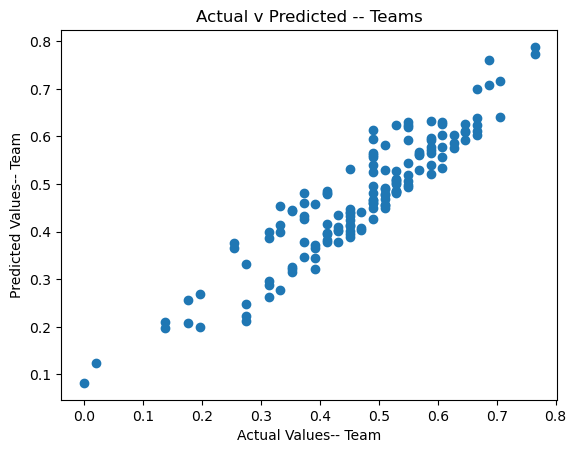

In [146]:
plt.scatter(tf_y_test, tf_predictions)
plt.xlabel('Actual Values-- Team')
plt.ylabel('Predicted Values-- Team')
plt.title('Actual v Predicted -- Teams')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

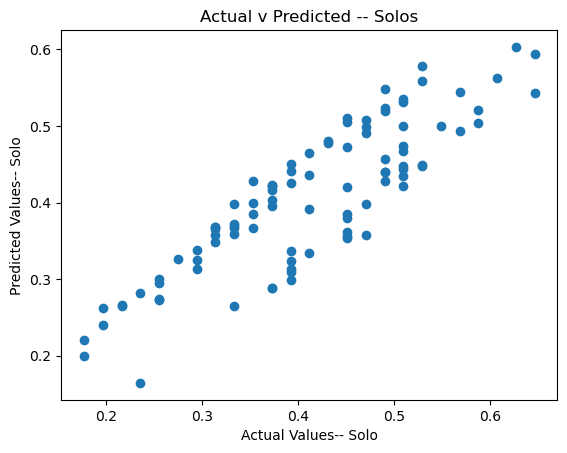

In [147]:
plt.scatter(sf_y_test, sf_predictions)
plt.xlabel('Actual Values-- Solo')
plt.ylabel('Predicted Values-- Solo')
plt.title('Actual v Predicted -- Solos')
plt.show